# Suicide Rates Overview 1985 to 2016

Compares socio-economic info with suicide rates by year and country.
This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

# Attribute Information

1.sex

2.age.....The age is summarized within a certain range.
     5-14 years
 
     15-24 years
 
     25-34 years
 
     35-54 years
 
     55-74 years
 
     75+ years

3.suicides_no.....Number of suicidals.

4.population

5.suicides/100k pop......Suicide by population of 100,000 people.

6.country-year.....Combination of country and year.

7.HDI for year......The Human Development Index (HDI) is a simple indicator for measuring the average degree of accomplishment in a country regarding three aspects of human development: health, education, and income.

8.gdp_for_year ($)

9.gdp_per_capita ($)

10.generation.....Generations in America.

      G.I. Generation…1900 - 1924
  
      Silent…1925 - 1942
  
      Boomers…1946 - 1964
  
      Generation X …1965 - 1980
  
      Millenials…1981 - 2000
  
      Generation Z…2001 - 2010

First importing libraries that are necessary in this visualisation 

In [25]:
import numpy as np
import thinkplot
import thinkstats2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

Now using pandas we have read the dataset

In [26]:
df = pd.read_csv('Master.csv')

And through head and tail i have checked the the top five and bottom five values in dataset and this datset contains some column with categorial data i.e country ,sex ,country-year ,generation and other remaining are numerical data

In [27]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


In [28]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Boomers


Changed some name of columns for the further convenience 

In [29]:
df.columns=["country","year","sex","age","suicides_no","population","suicide_pop","country_year","hdi","gdp_for_year","gdp_per_capita","generation"]

This dataset contains more than 27 thousand rows and 12 columns

In [30]:
df.shape

(27820, 12)

And through this we came to know that dataset contain some null values .So first we need to clean them 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country           27820 non-null object
year              27820 non-null int64
sex               27820 non-null object
age               27820 non-null object
suicides_no       27820 non-null int64
population        27820 non-null int64
suicide_pop       27820 non-null float64
country_year      27820 non-null object
hdi               8364 non-null float64
gdp_for_year      27820 non-null object
gdp_per_capita    27820 non-null int64
generation        27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [32]:
df.describe()

,year,suicides_no,population,suicide_pop,hdi,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


Now we can see that only hdi contains null value and rest others are clean

In [33]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicide_pop           0
country_year          0
hdi               19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

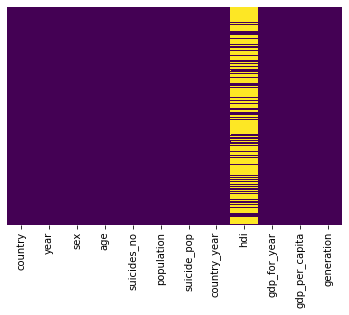

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Remove Missing Values And Outliers

Now we have removed null values from the dataset

In [32]:
def impute_median(series):
    return series.fillna(series.median())

In [33]:
df.hdi =df["hdi"].transform(impute_median)

In [34]:
df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no       0
population        0
suicide_pop       0
country_year      0
hdi               0
gdp_for_year      0
gdp_per_capita    0
generation        0
dtype: int64

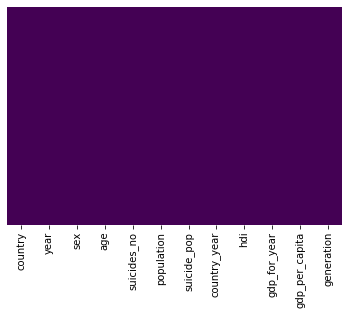

In [35]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

After removing null values , we have also removed outliers and now our data is reduced to around 14 thousand rows .So dataset is now clean and ready for visualisation

In [36]:
df1 = df.copy()
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df1 = df1[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

year                   13.00
suicides_no           128.00
population        1388644.75
suicide_pop            15.70
hdi                     0.00
gdp_per_capita      21427.00
dtype: float64


(14223, 12)

# EDA

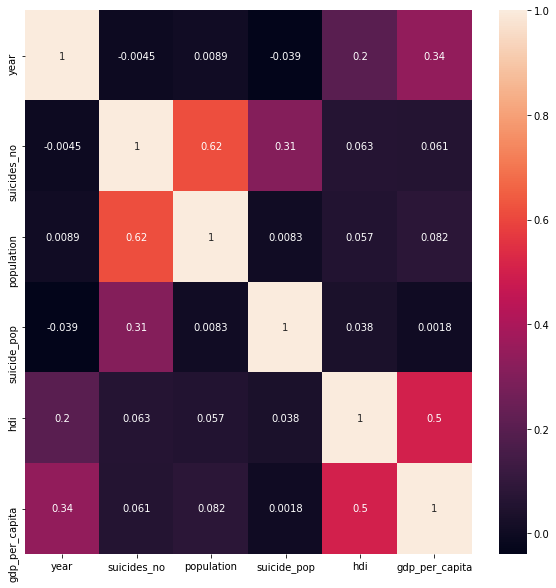

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

The heatmap shows the correlation between the features in the dataset and in this population and suicide_no are highly correlated with 62% 

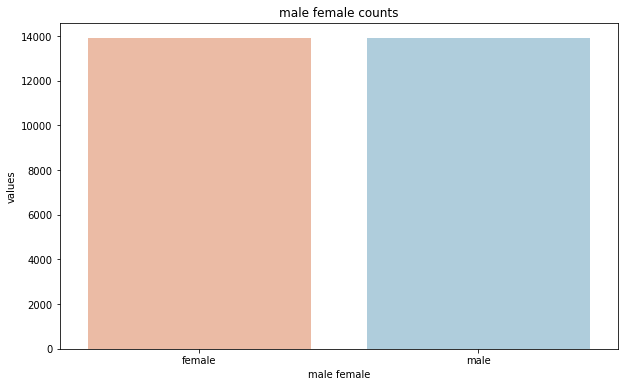

In [38]:
plt.figure(figsize=(10,6))
count= df['sex'].value_counts()
sns.barplot(x=count.index, y=count.values,palette="RdBu")
plt.ylabel("values")
plt.xlabel("male female")
plt.title("male female counts");

From the above barplot we came to know there are equal number of male and female  in the dataset

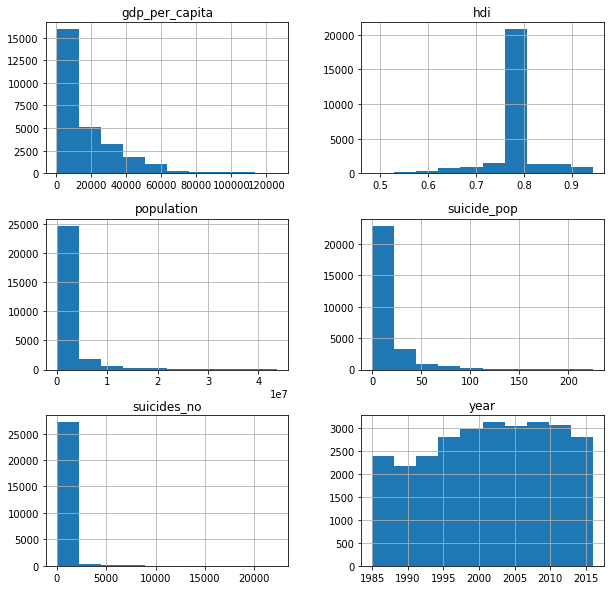

In [39]:
df.hist(figsize=(10,10));

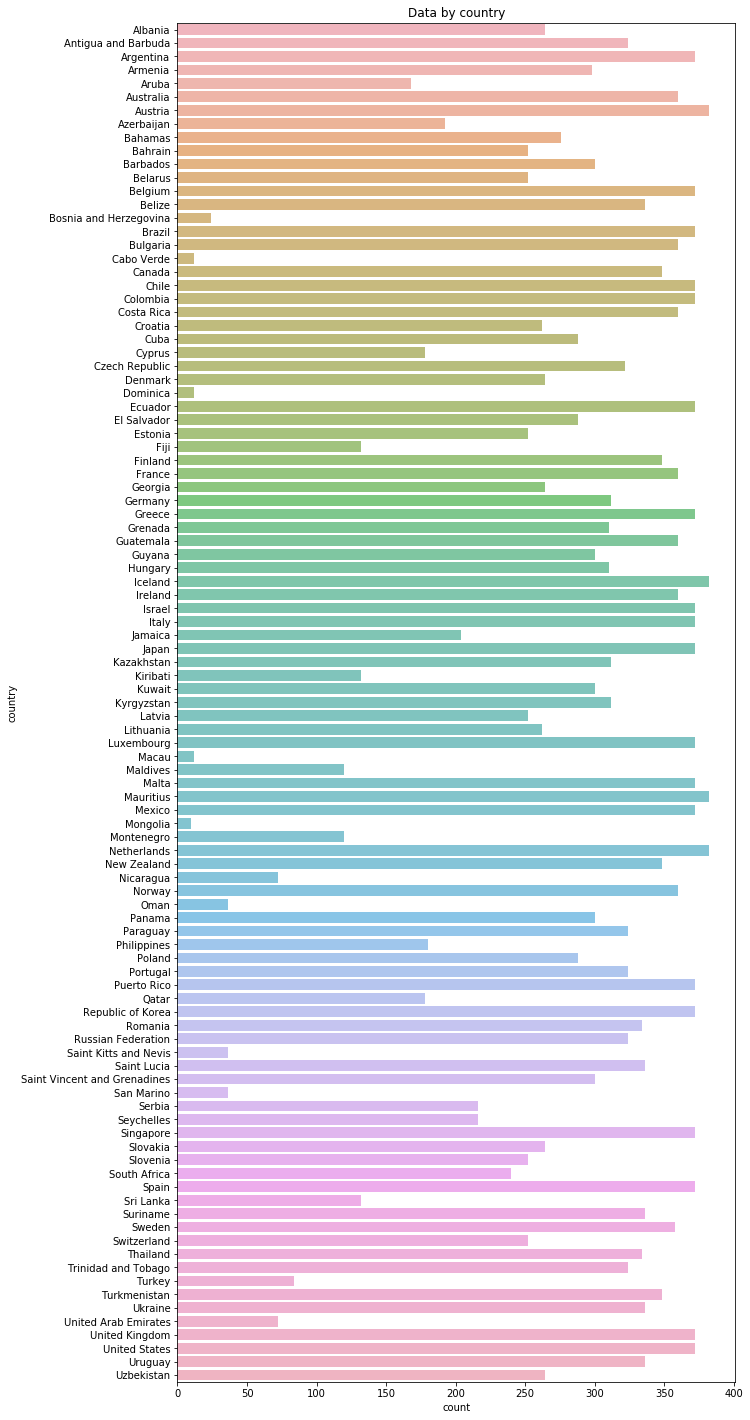

In [40]:
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=df, alpha=0.7)
plt.title('Data by country')
plt.show()

Now lets see the number of data in each country.

Its the number of data, not the number of suicides.

And through this we can se that many countries have good amount of data but on the other side there are some countries which are having less amount of data i.e Cabo verde , Dominica, Macau and Mangolia

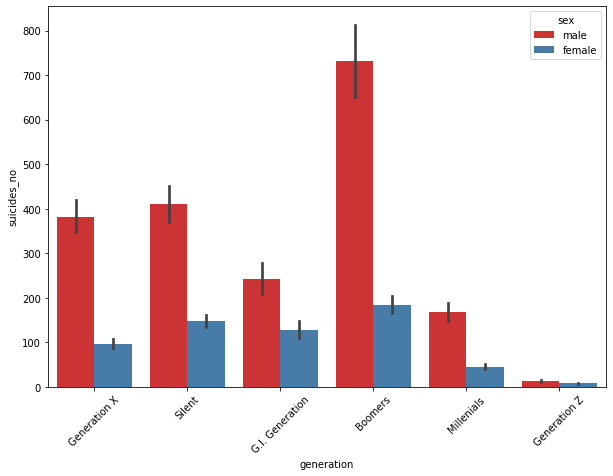

In [41]:
plt.figure(figsize=(10,7))
sns.barplot(x = "generation", y = "suicides_no", hue = "sex", data = df,palette='Set1')
plt.xticks(rotation=45)
plt.show()

From the above barplot we can see number of suicides by each generation in both the gender .We can observe that higher number of suicides in both male and female are in boomers around 700 and 200 respectively.
And lowest are in Generation Z by both male and female around 20 and 10 respectively.

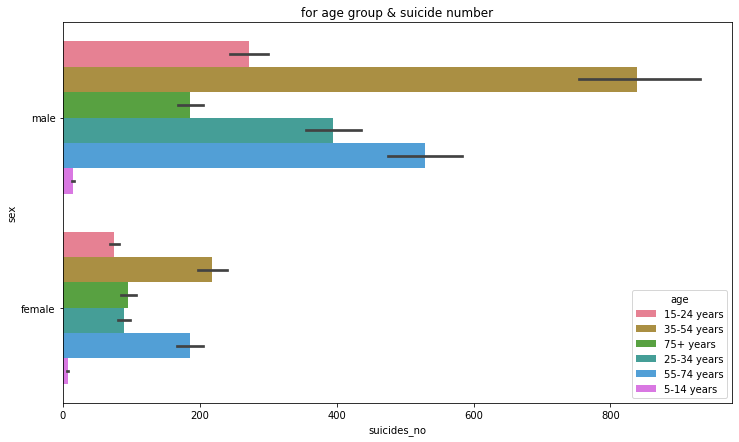

In [42]:
plt.figure(figsize=(12,7))
sns.barplot(y="sex", x="suicides_no",  hue="age", data=df,palette = 'husl')
plt.title('for age group & suicide number')
plt.show()

The above plot shows the suicide committed by different age group in both the genders . We can observe that suicide number are higher in age group of 35-54 years in both male and female resp. and lowest in the age group 5-14 years in both male and female

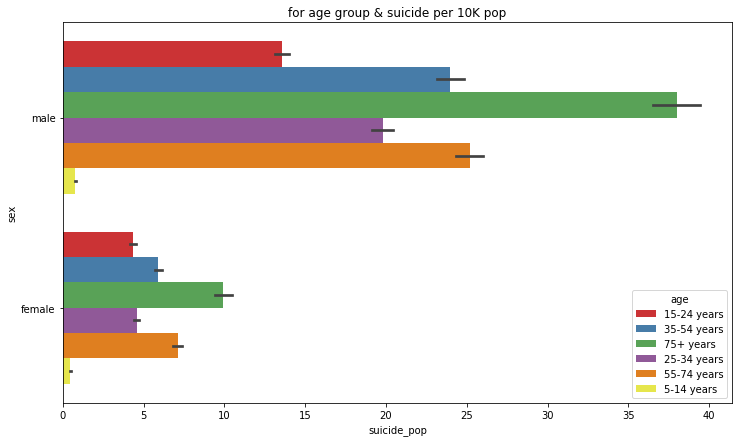

In [43]:
plt.figure(figsize=(12,7))
sns.barplot(y="sex", x="suicide_pop",  hue="age", data=df,palette = 'Set1')
plt.title('for age group & suicide per 10K pop')
plt.show()

The above plot shows the suicide committed by 10K popuation in different age group across both the genders . We can observe that suicides are higher in age group of 75+ years in both male and female resp. and lowest in the age group 5-14 years in both male and female

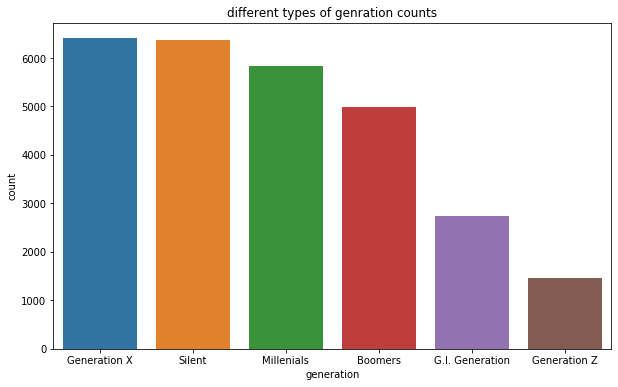

In [44]:
plt.figure(figsize=(10,6))
count= df['generation'].value_counts()
sns.barplot(x=count.index, y=count.values)
plt.ylabel("count")
plt.xlabel("generation")
plt.title("different types of genration counts");

From the above barplot we can seen the count of each generation , we can see the highest nummber of data in Generation X and slighly less in Silent , therefore Millenials and Boomers are in the range of 5000 each and Generation Z has the lower number of data

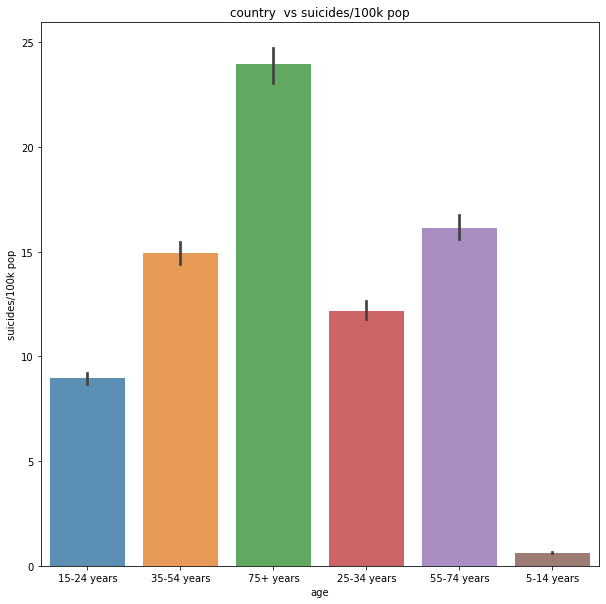

In [155]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['age'],y=df['suicides/100k pop'],data = df,alpha=0.8)
plt.title('country  vs suicides/100k pop');

This shows the suicides done by per10K population .In this we can see 75+ years the more suicidal and 5-14 years are the least

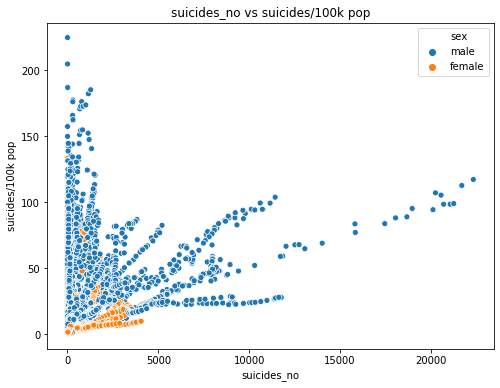

In [156]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='suicides_no',y='suicides/100k pop',data=df,hue='sex')
plt.title('suicides_no vs suicides/100k pop');

Now above is the Scatter plot for suicide done by per 10K population and suicide number and from this we can see that mens are more suicidal than female 

Text(0.5, 1.0, 'year vs suicide number')

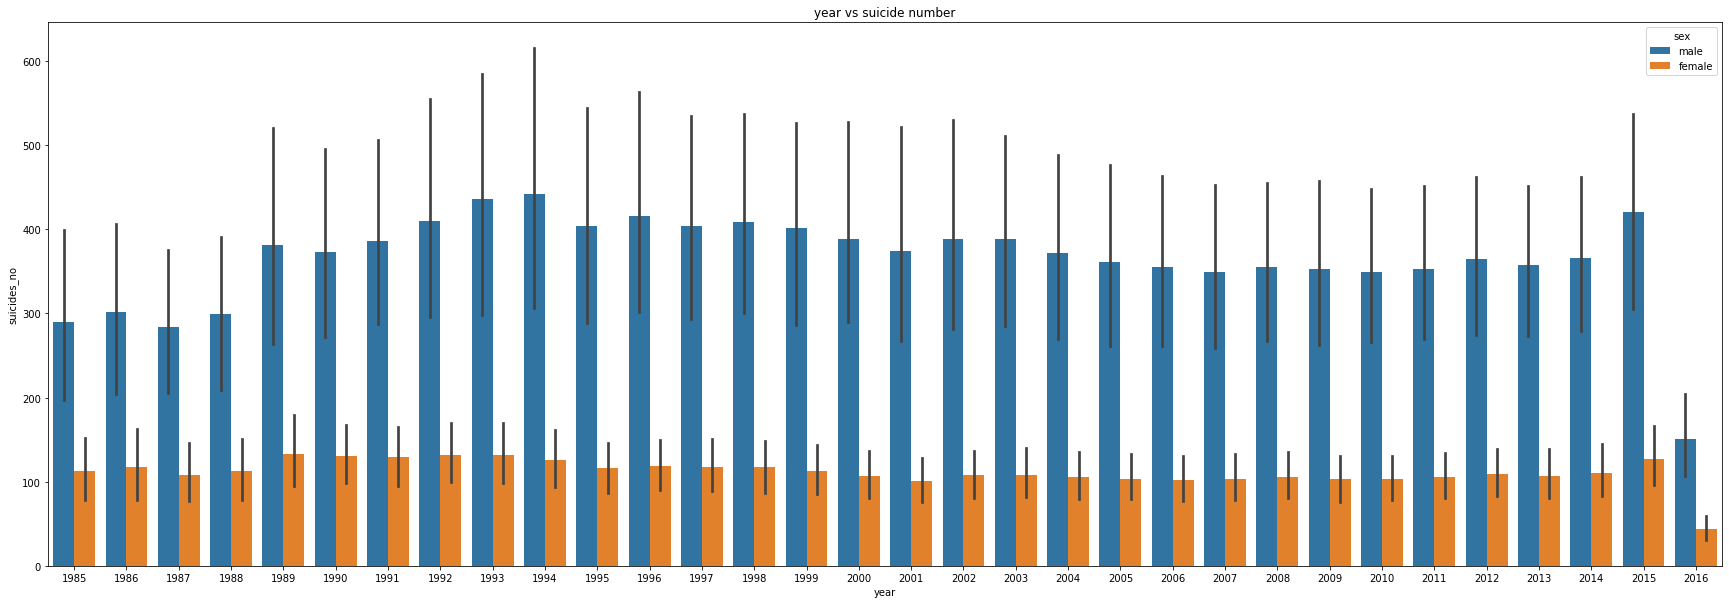

In [157]:
plt.figure(figsize=(30,10))
sns.barplot(data=df,x='year',y='suicides_no',hue='sex')
plt.title('year vs suicide number')

From this we can see that mens are more suicidal in the year 1994 and womens are more suicidal in 1989

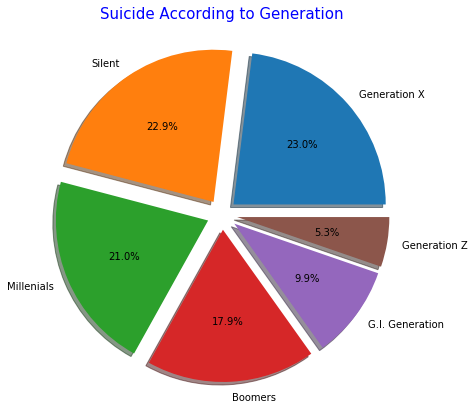

In [158]:
labels = df.generation.value_counts().index
sizes = df.generation.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=[0.1,0.1,0.1,0.1,0.1,0.1], labels=labels, autopct='%1.1f%%',shadow=True)
plt.title('Suicide According to Generation',color = 'blue',fontsize = 15)
plt.show()

The above pie chart depicts that Generation X are having 23% of death case and slightly less in Silent and millenials as 22.9% and 21.0% respectively and generation Z has least number of death case

# Through the data visualization, the following three points were clarified.

Men are more suicidal than women.

The people at age of 35-54 years suicide most. However, in the suicide per 100,000 people, the people at ages over 75 suicide most.

When GDP is low, the number of suicide increases.

In [35]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)



In [36]:
print(X_selected)

[[ 8.02405936e-01  6.38838568e-01  2.66029461e-01 -5.87386257e-02
  -1.09812345e+00 -3.41589327e-01 -1.39586790e+00 -6.18569992e-01
   3.52478394e-02  8.29425232e-01]
 [-2.09754467e-01  1.57999804e+00 -1.92996532e+00 -1.56034292e+00
  -7.15593487e-01  1.67454945e-01  1.02037764e-01  1.34451071e+00
  -4.80180115e-01  2.85285038e-01]
 [-3.03874858e-01  1.22414262e+00  1.79843701e+00 -2.18934210e+00
  -3.45045104e-02  8.02867345e-01  5.12884517e-01 -3.71158286e-01
  -1.29655289e+00  1.83764711e-01]
 [-6.62577767e-01 -1.39759012e+00 -2.00362417e-01 -7.76828491e-01
   1.28457938e+00 -1.58624114e+00 -1.64961987e-01  1.65462749e+00
   1.93741973e+00  4.33915776e-01]
 [-4.23727646e-01  1.81787954e+00  1.54200402e+00 -5.85360440e-01
   1.12425382e+00 -5.90975193e-01  6.28084780e-01 -2.65091779e-01
  -5.84790193e-01  3.35431285e-01]
 [-2.06144689e+00 -4.55540126e-01 -7.26759527e-01  1.85135079e+00
  -9.21573289e-01 -1.38450675e+00 -1.28044706e+00 -1.18891658e-01
   2.24142246e-01 -1.48121364e+00

In [159]:
corr_matrix = df.corr()

In [160]:
corr_matrix['suicides_no'].sort_values(ascending=False)

suicides_no          1.000000
population           0.616162
suicides/100k pop    0.306604
HDI for year         0.151399
gdp_per_capita       0.061330
year                -0.004546
Name: suicides_no, dtype: float64

Through this we can se that suicide number and population is highly correlated with 62% and  some has negative correlation also

# DATA PRE PROCESSING

Now after the visualisation , data is ready for preprocessing 

In [161]:
X= df.iloc[:, 7]
Y= df.iloc[:, 5]

In [162]:
X.head()

0    Albania1987
1    Albania1987
2    Albania1987
3    Albania1987
4    Albania1987
Name: country-year, dtype: object

In [163]:
X= pd.DataFrame(df.iloc[:, 7])
Y= pd.DataFrame(df.iloc[:, 5])

In [164]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X= LabelEncoder()
X.iloc[:,0] = labelencoder_X.fit_transform(X.iloc[:,0])

onehotencoder = OneHotEncoder(categorical_features=[0])
X = onehotencoder.fit_transform(X).toarray()

labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)


/Users/aryansharma/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/aryansharma/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/Users/aryansharma/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:

In [165]:
print(labelencoder_X.classes_)

['Albania1987' 'Albania1988' 'Albania1989' ... 'Uzbekistan2012'
 'Uzbekistan2013' 'Uzbekistan2014']


# LINEAR REGRESSION

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [167]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , Y_train)


print('coefficent\n' , regressor.coef_)

print('intercept' , regressor.intercept_)


Y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
print("mean squared error::: {}".format(mean_squared_error(Y_test,Y_pred)))
print("r2 score: {}".format(r2_score(Y_test,Y_pred)))
#print(np.sqrt(metrics.mean_absolute_error(Y_test, Y_pred)))
#sns.heatmap(dataset.corr(),annot=True)




coefficent
 [-3.78153704e+14 -3.78153704e+14 -3.78153704e+14 ... -3.78153704e+14
 -3.78153704e+14 -3.78153704e+14]
intercept 378153704494329.5
mean squared error::: 8435605.445867827
r2 score: 0.8474096124693147


Mean Squared Error and R2 score are used to calculate the accuracy of our model. The mean Squared Error for our model came out to be 8152085 and r2 score for our model came out to be 0.005. Hence we got 85% accuracy for our trained model.Its perfect.

# Multiple linear Regression


Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. Multiple regression is an extension of linear (OLS) regression that uses just one explanatory variable.

Similarly I applied all the all steps to find the multiple linear regression

In [168]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
y_pred = model.predict(X_test)

So in this I Showcased the starting 50 values on the basis of their real values and what the machine predicted to see the closeness between them

In [170]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print(df1.head(50))

    Actual   Predicted
0    11662  11245.2500
1    10076  11172.1875
2    14142  16047.8125
3    16513  14513.0000
4    12797  13541.6875
5    22830  19589.0000
6    19440  17859.6250
7     3673  11245.2500
8     2324   5600.1875
9     1569   1187.3750
10   11322   7899.8750
11   24980  24066.5625
12     651   3497.8125
13   24531  23747.5000
14   21177  21215.2500
15   23496  21017.7500
16   23406  25319.9375
17    1293   8677.3125
18    2295   2238.6250
19   22852  22866.6875
20   11631  12088.9375
21    5665   5566.1875
22   16013  15365.3750
23   22978  23154.5000
24   12630  13847.2500
25   12528  14712.1250
26   19922  16710.5625
27     295    270.3125
28   25156  24024.5000
29   12450   7907.8750
30   21135  18266.5625
31   24641  23138.9375
32   10068  10195.0000
33   11807  15412.5625
34   18654  14118.1250
35   23015  21035.1250
36   17565  14224.0000
37   16600  12613.8750
38    9126   9521.5625
39   23134  21390.6875
40   10881   9613.9375
41      92    270.3125
42   10921 

In [171]:
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Mean squared error: {}".format(mean_squared_error(Y_test, y_pred)))
print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

Mean squared error: 8435605.445867827
Intercept: 
 378153704494329.5
Root Mean Square Error 
 2904.4113768314273
R^2 Value: 
 0.8474096124693147


So after applying the Multiple linear regression I found the my R2 score to be 85% and mean score error only 2855

# Using Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation. It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

In [172]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_train, y=Y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

0.8505011866609833
0.008282661635598893


We got a accuracy of 85 after applying cross validation

# Random Forrest Regression

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [173]:
X= pd.DataFrame(df.iloc[:, 11])
Y= pd.DataFrame(df.iloc[:, 6])

In [174]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X= LabelEncoder()
X.iloc[:,0] = labelencoder_X.fit_transform(X.iloc[:,0])

onehotencoder = OneHotEncoder(categorical_features=[0])
X = onehotencoder.fit_transform(X).toarray()

labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

/Users/aryansharma/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/aryansharma/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/Users/aryansharma/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)



In [176]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

After fitting the model on the constraints I used the cross Validtaion techinque directlty to improve my score On the both train and test

In [177]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=forest_reg, X=X_train, y=Y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

0.13514805841868532
0.012691585412015823


As you can see I got a worse accuracy than the linear, multiple regreesion  with an accuracy of 14%

# Decision Tree Regressor

Decision Tree - Regression. Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.Decision trees can handle both categorical and numerical

In [178]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [179]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=tree_reg, X=X_train, y=Y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

0.13522568925347306
0.012685024430034053


As you can see I got A values of 13% 

# Decision Tree

A decision tree classifier is a tree in which internal nodes are labeled by features. ... The classifier categorizes an object xi by recursively testing for the weights that the features labeling the internal nodes have in vector xi, until a leaf node is reached. The label of this node is then assigned to xi.

In [180]:
X = df['population'].values.reshape(-1,1)
Y = df['suicides_no'].values

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)



In [182]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [183]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

def accuracy(cm):
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
def error_rate(cm):
    return (cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
def sensitivity(cm):
    return cm[0][0]/(cm[0][0]+cm[0][1])
def specificity(cm):
    return cm[1][1]/(cm[1][0]+cm[1][1])
def precision(cm):
    return cm[0][0]/(cm[0][0]+cm[1][0])
def recall(cm):
    return cm[0][0]/(cm[0][0]+cm[0][1])
def f(cm):
    return (2*precision(cm)*recall(cm))/(precision(cm)+recall(cm))

In [184]:
print(accuracy(cm))
print(error_rate(cm))
print(sensitivity(cm))
print(specificity(cm))
print(precision(cm))
print(recall(cm))
print(f(cm))

0.7091412742382271
0.29085872576177285
0.837979094076655
0.20945945945945946
0.8043478260869565
0.837979094076655
0.8208191126279862


I got a 71.0% accuracy after applying the decision tree classifier which tells me that decision tree regressor was a better option for my dataset

#  LOGISTIC REGREESION

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [186]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,15,66,24,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,15,66,24,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,15,66,24,900",796,Generation X


Firstly I saw my datset and analysed which coloums were not useful for my prediction

In [187]:
df.drop( ['country', 'year','country-year', 'age', 'suicides_no','HDI for year' ,'generation'], axis = 1 , inplace = True)

In [188]:
df.drop(df.columns[[3, 4]], axis = 1, inplace = True)

After seeing the dataset I dropped all the coloums which were not useful

In [189]:
df

,sex,population,suicides/100k pop
0,male,312900,6.71
1,male,308000,5.19
2,female,289700,4.83
3,male,21800,4.59
4,male,274300,3.28
5,female,35600,2.81
6,female,278800,2.15
7,female,257200,1.56
8,male,137500,0.73
9,female,311000,0.00


After that I showed the filtered dataset

In [190]:
y = df['sex'].values
X = df.drop('sex', axis = 1).values

After that i took Sex as the predecting variable

In [191]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_X = LabelEncoder()
X[:, 0] = labelEncoder_X.fit_transform(X[:, 0])

In [192]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Preprocessing is the main part of our model training. Since our data does not consists any null values and the variables we have taken are both numeric therefore, thier is no need of label Encoding and one hot encoding for converting categorical data into numeric. We directly move on to the standard scaling for converting our values into a range that makes computation quite easier and faster. As we can see the array have the values ranging from -1 to 1.

In [193]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [194]:
X_train 

array([[-1.58913565, -0.67591279],
       [-0.12267098, -0.64901571],
       [-0.58746389,  0.14576646],
       ...,
       [ 0.71492458,  0.40471672],
       [-0.55182439, -0.34681917],
       [-1.00101661,  0.59194145]])

In [195]:
y_train

array(['female', 'male', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

And Here I applied my logistic regresion command

In [196]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/Users/aryansharma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array(['female', 'female', 'male', ..., 'male', 'female', 'male'],
      dtype=object)

And then I store my Predicted Values in y_predict_train so that i can find my accuracy using confusion_matrix

In [198]:
y_train

array(['female', 'male', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

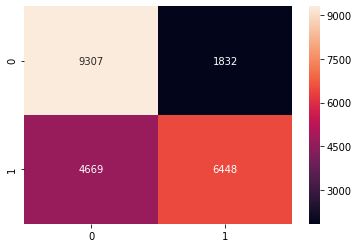

In [199]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm , annot = True, fmt = "d")

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [200]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

      female       0.67      0.84      0.74     11139
        male       0.78      0.58      0.66     11117

    accuracy                           0.71     22256
   macro avg       0.72      0.71      0.70     22256
weighted avg       0.72      0.71      0.70     22256



Here i got a accuracy of 72%  

And then I can created a classification report to see the accuracy

In [201]:
y_pred_test = classifier.predict(X_test)
y_pred_test

array(['female', 'female', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

      female       0.66      0.83      0.74      2771
        male       0.77      0.58      0.66      2793

    accuracy                           0.70      5564
   macro avg       0.72      0.70      0.70      5564
weighted avg       0.72      0.70      0.70      5564



Here i got a accuracy of 72% 

# KNN

I Read the Dataset again Cause when I had worked earlier on the logistic regression i deleted certain coloums so too get those coloums back i read the dataset again

After that I applied the same techniques i used on the logistic regression took only the useful coloums

In [203]:
df = pd.read_csv('Master.csv')

In [204]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,15,66,24,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,15,66,24,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,15,66,24,900",796,Generation X


In [205]:
df.drop( ['country', 'year','country-year', 'age', 'suicides_no','HDI for year' ,'generation'], axis = 1 , inplace = True)

In [206]:
df

,sex,population,suicides/100k pop,gdp_for_year,gdp_per_capita
0,male,312900,6.71,"2,15,66,24,900",796
1,male,308000,5.19,"2,15,66,24,900",796
2,female,289700,4.83,"2,15,66,24,900",796
3,male,21800,4.59,"2,15,66,24,900",796
4,male,274300,3.28,"2,15,66,24,900",796
5,female,35600,2.81,"2,15,66,24,900",796
6,female,278800,2.15,"2,15,66,24,900",796
7,female,257200,1.56,"2,15,66,24,900",796
8,male,137500,0.73,"2,15,66,24,900",796
9,female,311000,0.00,"2,15,66,24,900",796


In [207]:
df.drop(df.columns[[3, 4]], axis = 1, inplace = True)

In [208]:
df

,sex,population,suicides/100k pop
0,male,312900,6.71
1,male,308000,5.19
2,female,289700,4.83
3,male,21800,4.59
4,male,274300,3.28
5,female,35600,2.81
6,female,278800,2.15
7,female,257200,1.56
8,male,137500,0.73
9,female,311000,0.00


In [209]:
y = df['sex'].values
X = df.drop('sex', axis = 1).values

In [210]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_X = LabelEncoder()
X[:, 0] = labelEncoder_X.fit_transform(X[:, 0])

In [211]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [212]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [213]:
X_train 

array([[-1.58913565, -0.67591279],
       [-0.12267098, -0.64901571],
       [-0.58746389,  0.14576646],
       ...,
       [ 0.71492458,  0.40471672],
       [-0.55182439, -0.34681917],
       [-1.00101661,  0.59194145]])

In [214]:
y_train

array(['female', 'male', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

And then I took Imported the KNN classfier and my fitted my values in it

In [215]:
from sklearn.neighbors import KNeighborsClassifier

In [216]:
knn = KNeighborsClassifier(n_neighbors=1)

In [217]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [218]:
pred = knn.predict(X_test)

In [219]:
from sklearn.metrics import classification_report,confusion_matrix

In [220]:
print(confusion_matrix(y_test,pred))

[[1833  938]
 [ 956 1837]]


In [221]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      female       0.66      0.66      0.66      2771
        male       0.66      0.66      0.66      2793

    accuracy                           0.66      5564
   macro avg       0.66      0.66      0.66      5564
weighted avg       0.66      0.66      0.66      5564



And Then I got A accuracy of 66% using KNN Classifier

In [222]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In this I took the first values I predicted too see the error rate which every values produced and from where my model started to get stable

Text(0, 0.5, 'Error Rate')

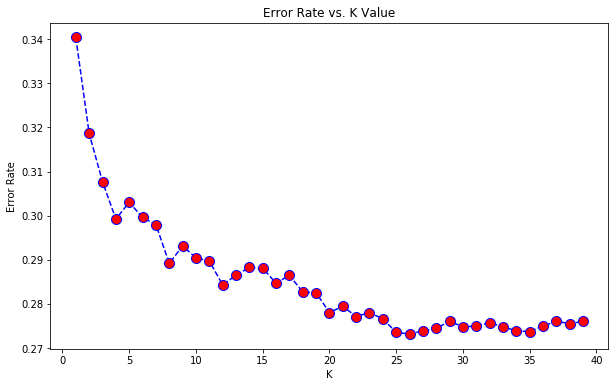

In [223]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [231]:
knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[2289  482]
 [1052 1741]]


              precision    recall  f1-score   support

      female       0.69      0.83      0.75      2771
        male       0.78      0.62      0.69      2793

    accuracy                           0.72      5564
   macro avg       0.73      0.72      0.72      5564
weighted avg       0.73      0.72      0.72      5564



As you can see my model started to get stable from the values 30 but i did'nt have the values of the prediction

So Then I found the accuracy on the neighbour 32 and found my accuracy to be 73%

# Naive Bayes

Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.
I again read the dataset again to get the whole dataset and too remove the unuseful coloums from it

In [232]:
df = pd.read_csv('Master.csv')

In [233]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,15,66,24,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,15,66,24,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,15,66,24,900",796,Generation X


In [234]:
df.drop( ['country', 'year','country-year', 'age', 'suicides_no','HDI for year' ,'generation'], axis = 1 , inplace = True)

In [235]:
df

,sex,population,suicides/100k pop,gdp_for_year,gdp_per_capita
0,male,312900,6.71,"2,15,66,24,900",796
1,male,308000,5.19,"2,15,66,24,900",796
2,female,289700,4.83,"2,15,66,24,900",796
3,male,21800,4.59,"2,15,66,24,900",796
4,male,274300,3.28,"2,15,66,24,900",796
5,female,35600,2.81,"2,15,66,24,900",796
6,female,278800,2.15,"2,15,66,24,900",796
7,female,257200,1.56,"2,15,66,24,900",796
8,male,137500,0.73,"2,15,66,24,900",796
9,female,311000,0.00,"2,15,66,24,900",796


In [236]:
df.drop(df.columns[[3, 4]], axis = 1, inplace = True)

In [237]:
df

,sex,population,suicides/100k pop
0,male,312900,6.71
1,male,308000,5.19
2,female,289700,4.83
3,male,21800,4.59
4,male,274300,3.28
5,female,35600,2.81
6,female,278800,2.15
7,female,257200,1.56
8,male,137500,0.73
9,female,311000,0.00


In [238]:
y = df['sex'].values
X = df.drop('sex', axis = 1).values

In [239]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_X = LabelEncoder()
X[:, 0] = labelEncoder_X.fit_transform(X[:, 0])

In [240]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [241]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [242]:
X_train 

array([[-1.58913565, -0.67591279],
       [-0.12267098, -0.64901571],
       [-0.58746389,  0.14576646],
       ...,
       [ 0.71492458,  0.40471672],
       [-0.55182439, -0.34681917],
       [-1.00101661,  0.59194145]])

In [243]:
y_train

array(['female', 'male', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

In [244]:
from sklearn.naive_bayes import GaussianNB 

In [245]:
NB_classifier = GaussianNB()

In [246]:
NB_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [247]:
from sklearn.metrics import classification_report, confusion_matrix

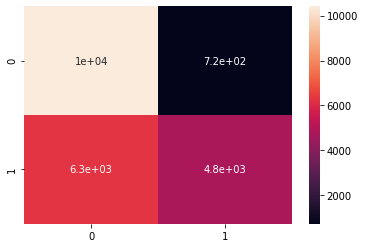

In [248]:
# Predict the training set results
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [249]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

      female       0.62      0.93      0.75     11139
        male       0.87      0.43      0.58     11117

    accuracy                           0.68     22256
   macro avg       0.75      0.68      0.66     22256
weighted avg       0.75      0.68      0.66     22256



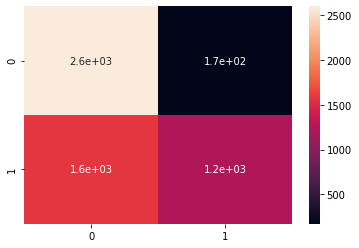

In [250]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [251]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

      female       0.62      0.94      0.75      2771
        male       0.88      0.44      0.58      2793

    accuracy                           0.69      5564
   macro avg       0.75      0.69      0.67      5564
weighted avg       0.75      0.69      0.67      5564



Found an Accuracy of 75%

# Ensamble Learning or Voting Classifier

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.It is of two types hard voting and soft voting

In [252]:
df = pd.read_csv('Master.csv')

In [253]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,15,66,24,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,15,66,24,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,15,66,24,900",796,Generation X


In [254]:
df.drop( ['country', 'year','country-year', 'age', 'suicides_no','HDI for year' ,'generation'], axis = 1 , inplace = True)

In [255]:
df

,sex,population,suicides/100k pop,gdp_for_year,gdp_per_capita
0,male,312900,6.71,"2,15,66,24,900",796
1,male,308000,5.19,"2,15,66,24,900",796
2,female,289700,4.83,"2,15,66,24,900",796
3,male,21800,4.59,"2,15,66,24,900",796
4,male,274300,3.28,"2,15,66,24,900",796
5,female,35600,2.81,"2,15,66,24,900",796
6,female,278800,2.15,"2,15,66,24,900",796
7,female,257200,1.56,"2,15,66,24,900",796
8,male,137500,0.73,"2,15,66,24,900",796
9,female,311000,0.00,"2,15,66,24,900",796


In [256]:
df.drop(df.columns[[3, 4]], axis = 1, inplace = True)

In [257]:
df

,sex,population,suicides/100k pop
0,male,312900,6.71
1,male,308000,5.19
2,female,289700,4.83
3,male,21800,4.59
4,male,274300,3.28
5,female,35600,2.81
6,female,278800,2.15
7,female,257200,1.56
8,male,137500,0.73
9,female,311000,0.00


In [258]:
y = df['population'].values
X = df.drop('population', axis = 1).values

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=395, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Hard Voting
In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.
Here I predicted my Atrribute G3 using Voting classfier technique

In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

 

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

 

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [261]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gin...
                                        

In [262]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.898989898989899
RandomForestClassifier 0.9393939393939394
SVC 0.9393939393939394
VotingClassifier 0.9292929292929293


In [263]:
y_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

# Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. If None, then the base estimator is a decision tree.

In [264]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

 

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [265]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9292929292929293


In [266]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.9191919191919192


Got a Accuracy of 93 % in BaggingClassifier Got a Accuracy of 91 % in DecisionTreeClassifier

# GRID SEARCHCV

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

In [267]:
df = pd.read_csv('Master.csv')

In [268]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,15,66,24,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,15,66,24,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,15,66,24,900",796,Generation X


In [269]:
df.drop( ['country', 'year','country-year', 'age', 'suicides_no','HDI for year' ,'generation'], axis = 1 , inplace = True)

In [270]:
df

,sex,population,suicides/100k pop,gdp_for_year,gdp_per_capita
0,male,312900,6.71,"2,15,66,24,900",796
1,male,308000,5.19,"2,15,66,24,900",796
2,female,289700,4.83,"2,15,66,24,900",796
3,male,21800,4.59,"2,15,66,24,900",796
4,male,274300,3.28,"2,15,66,24,900",796
5,female,35600,2.81,"2,15,66,24,900",796
6,female,278800,2.15,"2,15,66,24,900",796
7,female,257200,1.56,"2,15,66,24,900",796
8,male,137500,0.73,"2,15,66,24,900",796
9,female,311000,0.00,"2,15,66,24,900",796


In [271]:
df.drop(df.columns[[3, 4]], axis = 1, inplace = True)

In [272]:
y = df['population'].values
X = df.drop('population', axis = 1).values

In [273]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=395, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# SVM USING GRID SEARCHCV

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [275]:
svm_clf = GridSearchCV(estimator=SVC(gamma="auto",probability=True),param_grid={
    'C':[1,5,10],
    'kernel':['rbf']
},cv=5,return_train_score=False)
svm_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [276]:
svm_clf_df=pd.DataFrame(svm_clf.cv_results_)

In [277]:
svm_clf_pred=svm_clf.predict(X_test)
acc = accuracy_score(y_test, svm_clf_pred)
print("Accuracy: ",acc)

Accuracy:  0.9393939393939394


# KNN USING GRID SEARCHCV

In [278]:
knn_clf=GridSearchCV(estimator=KNeighborsClassifier(),param_grid={
    "n_neighbors":[5,11],
    "metric":['euclidean','manhattan'],'weights':['uniform','distance']
},cv=5,return_train_score=False)


In [281]:
knn_clf.fit(X_train,y_train)

/Users/aryansharma/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [282]:
knn_clf_df=pd.DataFrame(knn_clf.cv_results_)

In [283]:
knn_clf_pred=knn_clf.predict(X_test)
acc = accuracy_score(y_test, knn_clf_pred)
print("Accuracy: ",acc)

Accuracy:  0.9393939393939394


# RANDOM FOREST USING GRID SEARCHCV

In [284]:
rf_clf= GridSearchCV(estimator=RandomForestClassifier(),param_grid={
   "n_estimators" :[200,700],
    "max_features" : ['auto','sqrt','log2']
},cv=5,return_train_score=False)

In [285]:
rf_clf.fit(X_train,y_train)

/Users/aryansharma/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [286]:
rf_clf_df=pd.DataFrame(rf_clf.cv_results_)

In [287]:
rf_clf_pred=rf_clf.predict(X_test)

In [290]:
acc = accuracy_score(y_test, rf_clf_pred)
print("Accuracy: ",acc)

Accuracy:  0.9393939393939394


# CONCLUSION

We can conclude that linear regression is best suited for our regression model based on this dataset.Cross validation also does not effect the results. Rather than increase in accuracy, it get decreased by few percents.
In case of our classifier models, Decision tree, random forest and KNN performs very well. All these models have accuracy greater than 90%. SVM and Logistic regression does not perform well on the datasets as compare to other models. Cross Validation, Grid SearchCV and voting classifier does not affect the output of Random forest and KNN that much but in case of SVM, Soft voting increased the accuracy by 20%. We can conclude that we can use Decision tree, Random Forest or KNN for our future predictions.